In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from sklearn.datasets import load_files

In [2]:
#The path of our data on drive
data_dir =  r'C:/Users/vinot/My ML Projects/Final Year Project/augdata'
 
#Loading our Data
data = load_files(data_dir)

In [3]:
folders=os.listdir(r"C:/Users/vinot/My ML Projects/Final Year Project/augdata")
print(folders)

['ACER', 'APAL', 'CNAT', 'DANT', 'DSTR', 'GORG', 'MALC', 'MCAV', 'MMEA', 'MONT', 'PALY', 'SPO', 'SSID', 'TUNI']


In [4]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
# How the arrays look like?
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['C:/Users/vinot/My ML Projects/Final Year Project/augdata\\MCAV\\MCAV_original_mcav18.jpg_9f6d5147-8ca4-4362-ae53-82e433fb3851.jpg'
 'C:/Users/vinot/My ML Projects/Final Year Project/augdata\\DANT\\DANT_original_dant12.jpg_cf671871-f78c-43f4-8116-9169bf07d28f.jpg'
 'C:/Users/vinot/My ML Projects/Final Year Project/augdata\\DANT\\DANT_original_dant01.jpg_d545772c-d8ff-476c-bc8b-37818ebe5873.jpg'
 ...
 'C:/Users/vinot/My ML Projects/Final Year Project/augdata\\SPO\\SPO_original_spo13.jpg_e2fb189b-0d8c-483a-aa76-d424ad767296.jpg'
 'C:/Users/vinot/My ML Projects/Final Year Project/augdata\\SSID\\SSID_original_ssid26.jpeg_0ad5a8a2-749b-401e-817e-a9798b9c81d7.jpeg'
 'C:/Users/vinot/My ML Projects/Final Year Project/augdata\\DANT\\DANT_original_dant05.jpeg_70e9d5aa-51e8-4c8b-b5a8-df539b30f3f8.jpeg']
Target labels -  [ 7  3  3 ... 11 12  3]


In [5]:
print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  11900
Number of training targets :  11900


In [6]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape) 
print('First training item : ',X[0])

(11900, 150, 150, 3)
First training item :  [[[ 35.  21.  18.]
  [ 21.   1.   2.]
  [ 22.   2.   4.]
  ...
  [ 12. 143. 161.]
  [ 15. 153. 166.]
  [  1. 139. 149.]]

 [[ 44.  33.  29.]
  [ 14.   0.   0.]
  [ 25.   3.   5.]
  ...
  [ 34. 161. 176.]
  [ 21. 157. 171.]
  [  8. 150. 160.]]

 [[ 12.  11.   6.]
  [ 15.   4.   0.]
  [ 25.   4.   1.]
  ...
  [ 25. 147. 160.]
  [  6. 143. 153.]
  [ 16. 164. 174.]]

 ...

 [[ 31.   1.   0.]
  [ 38.   4.   2.]
  [ 35.   0.   3.]
  ...
  [ 29. 127. 112.]
  [ 17. 124.  98.]
  [ 31. 138. 110.]]

 [[ 33.   3.   0.]
  [ 55.  21.  20.]
  [ 39.   3.   5.]
  ...
  [ 66. 149. 141.]
  [ 43. 136. 118.]
  [ 21.  98.  78.]]

 [[ 49.  18.  13.]
  [ 40.   6.   5.]
  [ 42.   6.   8.]
  ...
  [ 14. 100.  91.]
  [ 15. 103.  87.]
  [ 37. 100.  81.]]]


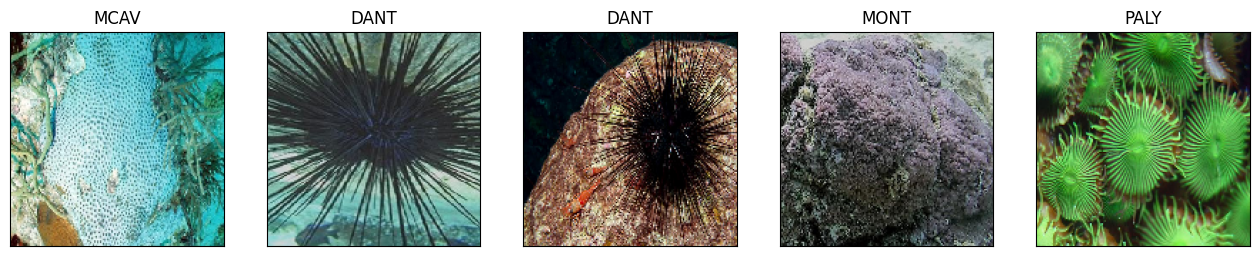

In [7]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])
    

In [8]:
# Let's resize or rescale training data
X = X.astype('float32')/255
 
# Let's confirm the number of classes :) 
no_of_classes = len(np.unique(y))
no_of_classes

14

In [9]:
y

array([ 7,  3,  3, ..., 11, 12,  3])

In [10]:
from tensorflow.python.keras.utils import np_utils

# let's converts a class vector (integers) to binary class matrix.
y = np_utils.to_categorical(y-1,no_of_classes)
y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split

# let's splite the data into subsets and explore their shapes !

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The training Data Shape ', X_train.shape[0])
 
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The validation Data Shape ', X_test.shape[0])
print('The test Data Shape ', X_test.shape[0])

The training Data Shape  9520
The validation Data Shape  1190
The test Data Shape  1190


In [12]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=128, activation='relu', name='Dense_3'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_1 (MaxPooling2D)             │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_3 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_4 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_2 (MaxPooling2D)             │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_5 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_6 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_3 (MaxPooling2D)             │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,311,406 (73.67 MB)

 Trainable params: 19,311,406 (73.67 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [17]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
 
# Time to train our model !
epochs = 50
batch_size=32
 
train_datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator()
 
train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)
 
validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)
 
checkpointer = ModelCheckpoint(filepath = r"C:\Users\vinot\My ML Projects\Final Year Project\crs1.keras", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
# let's get started !
 
history=model.fit(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0965 - loss: 2.7850
Epoch 1: val_loss improved from inf to 2.26512, saving model to C:\Users\vinot\My ML Projects\Final Year Project\crs1.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.0966 - loss: 2.7842 - val_accuracy: 0.2168 - val_loss: 2.2651 - learning_rate: 0.0010
Epoch 2/50
  1/297 ━━━━━━━━━━━━━━━━━━━━ 9:14 2s/step - accuracy: 0.2500 - loss: 2.1759

C:\Users\vinot\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss did not improve from 2.26512
297/297 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.2500 - loss: 2.1759 - val_accuracy: 0.2168 - val_loss: 2.3096 - learning_rate: 0.0010
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2571 - loss: 2.1889
Epoch 3: val_loss improved from 2.26512 to 1.74025, saving model to C:\Users\vinot\My ML Projects\Final Year Project\crs1.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.2572 - loss: 2.1885 - val_accuracy: 0.3950 - val_loss: 1.7403 - learning_rate: 0.0010
Epoch 4/50
  1/297 ━━━━━━━━━━━━━━━━━━━━ 6:58 1s/step - accuracy: 0.3125 - loss: 2.0095
Epoch 4: val_loss did not improve from 1.74025
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.3125 - loss: 2.0095 - val_accuracy: 0.3429 - val_loss: 1.8798 - learning_rate: 0.0010
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4036 - loss: 1.7645
Epoch 5: val_loss improved from 1.74025 to 1.44421, saving model to C:\Users\vinot\My ML Pro

In [18]:
(eval_loss, eval_accuracy) = model.evaluate(  
     X_test, y_test, batch_size=batch_size, verbose=2)
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

38/38 - 11s - 280ms/step - accuracy: 0.9832 - loss: 0.0620
Accuracy: 98.32%
Loss: 0.062014538794755936


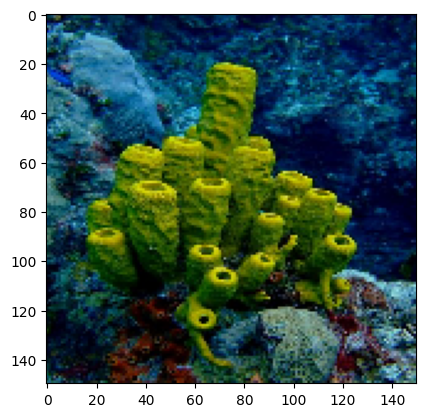

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [19]:
plt.imshow(X[11])
plt.show()
y[11]

298/298 ━━━━━━━━━━━━━━━━━━━━ 91s 305ms/step


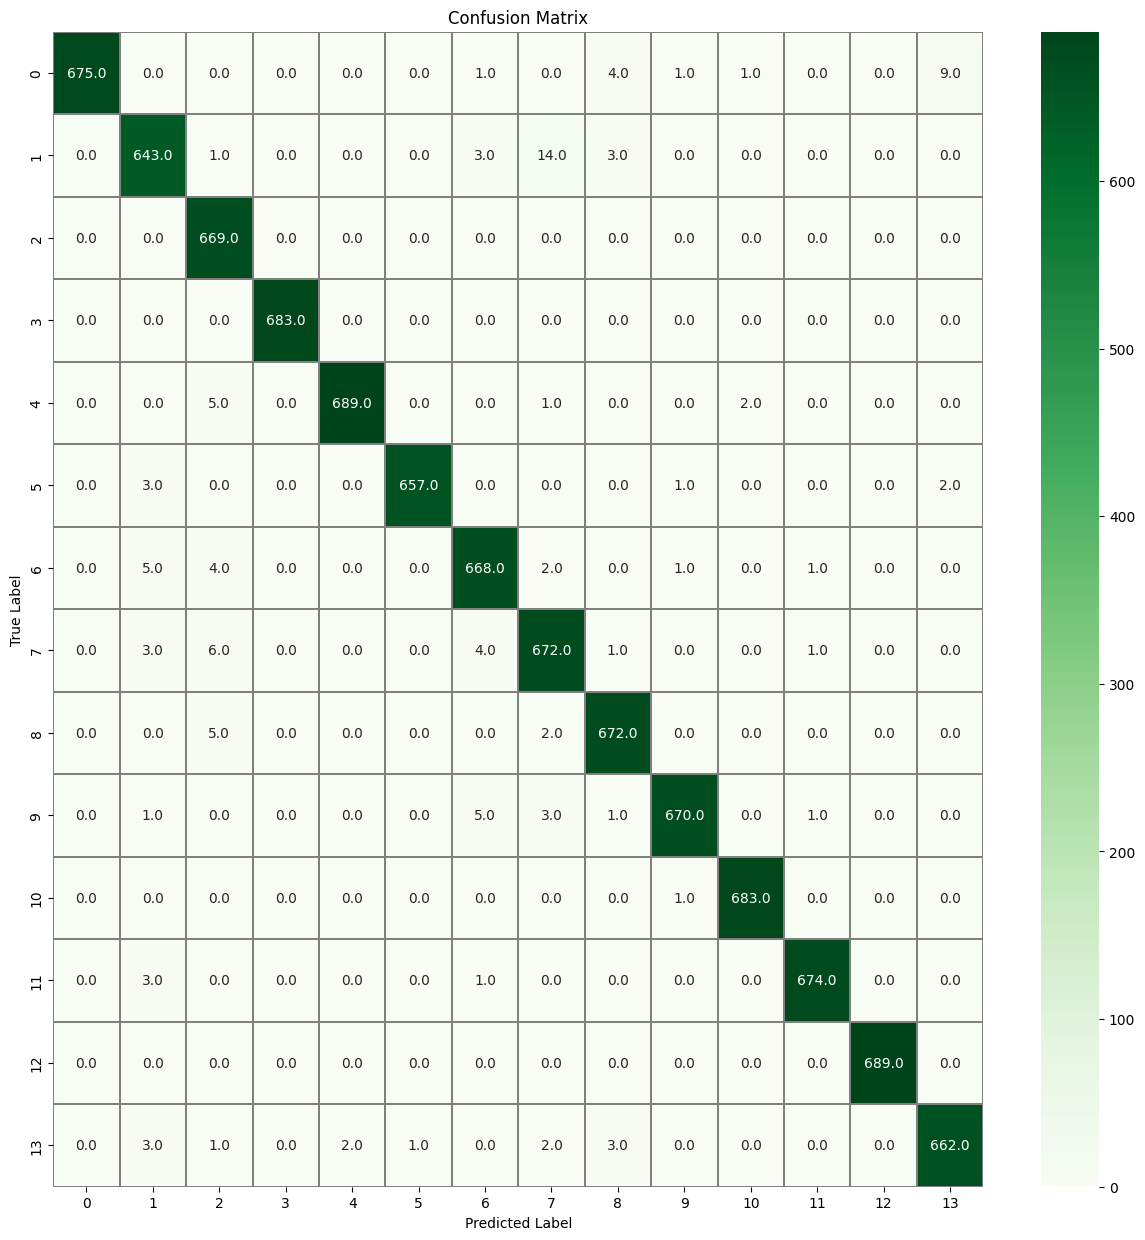

In [20]:
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_train)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_train,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

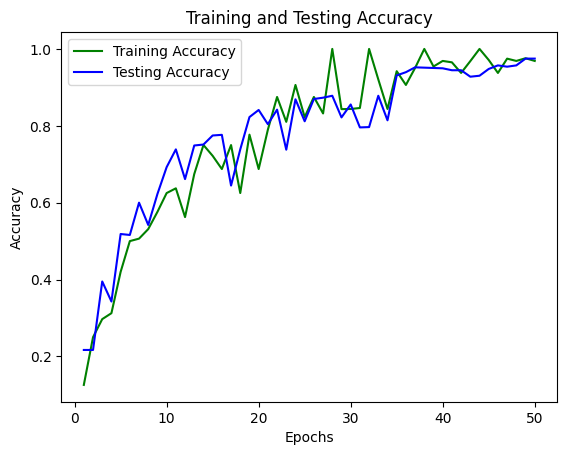

In [21]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

epochs = range(1,51)

plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Testing Accuracy') # validation accuravy
plt.title('Training and Testing Accuracy')    # validation accuravy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

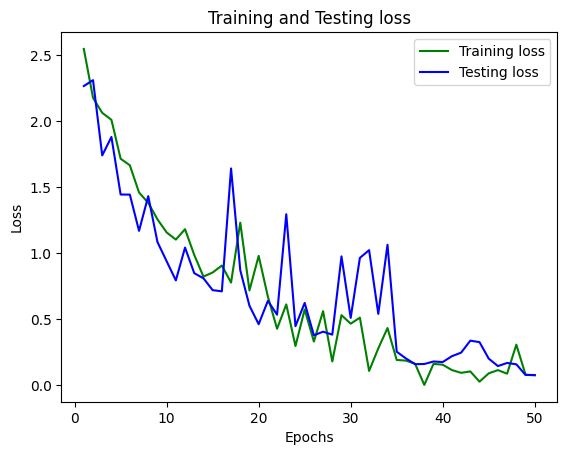

In [22]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,51)

plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Testing loss')# validation loss
plt.title('Training and Testing loss')# validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       691
           1       0.97      0.97      0.97       664
           2       0.97      1.00      0.98       669
           3       1.00      1.00      1.00       683
           4       1.00      0.99      0.99       697
           5       1.00      0.99      0.99       663
           6       0.98      0.98      0.98       681
           7       0.97      0.98      0.97       687
           8       0.98      0.99      0.99       679
           9       0.99      0.98      0.99       681
          10       1.00      1.00      1.00       684
          11       1.00      0.99      0.99       678
          12       1.00      1.00      1.00       689
          13       0.98      0.98      0.98       674

    accuracy                           0.99      9520
   macro avg       0.99      0.99      0.99      9520
weighted avg       0.99      0.99      0.99      9520



In [26]:
 model.save('coralfinalmodel.h5')